<a href="https://colab.research.google.com/github/PriyanshuKadam/Spotify_Data_Analysis/blob/main/Spotify_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and ETL Process

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_tracks= pd.read_csv('Spotify.csv')
df_tracks

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,Emotions
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232711,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,0.962
232712,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,0.969
232713,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,0.813
232714,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,0.489


In [ ]:
#find Null values
pd.isnull(df_tracks).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
Emotions            0
dtype: int64

In [ ]:
df_tracks['duration_ms'] = (df_tracks['duration_ms'] / 1000)
df_tracks.rename({'duration_ms': 'duration_sec'}, axis=1, inplace=True)
df_tracks.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,Emotions
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99.373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137.373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170.267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152.427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82.625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,0.390


In [ ]:
#Remove all the spaces
df_tracks['artist_name'] = df_tracks['artist_name'].str.replace(" ", "")
df_tracks

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,Emotions
0,Movie,HenriSalvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99.373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,Martin&lesfées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137.373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,JosephWilliams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170.267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,HenriSalvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152.427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,FabienNataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82.625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232711,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326.240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,0.962
232712,Soul,JrThomas&TheVolcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282.447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,0.969
232713,Soul,MuddyWaters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166.960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,0.813
232714,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222.442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,0.489


# Data Analysis

**1. Every genre will have all unique song two genre will not have one song**

In [ ]:
sorted_df = df_tracks.sort_values('popularity', ascending = False)
df_onetracks=sorted_df.drop_duplicates(subset='track_name',keep='first')
df_onetracks

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,Emotions
9027,Dance,ArianaGrande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178.640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,0.319
9026,Dance,ArianaGrande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190.440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,0.335
86946,Rap,PostMalone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149.520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,0.385
107904,Pop,DaddyYankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193.227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,0.656
107801,Pop,PostMalone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158.040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,0.913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195730,Movie,Chorus,Anandabhairavi,1J7VPB980Q6XdsuwIeEgNW,0,0.7100,0.397,248.842,0.810,0.000242,G,0.2910,-7.058,Minor,0.4720,182.416,0.526
195731,Movie,LucieDolene,"Quel temps fait-il à Paris ? (From ""Les vacanc...",1JeSn51usJJZENvNOjUyjZ,0,0.9920,0.478,168.800,0.167,0.002140,F,0.3670,-16.040,Minor,0.0432,125.812,0.336
195734,Movie,LeopoldStokowski,Tchaikovsky: Aurora's Wedding Ballet Music: Ac...,1P87O9nlFeciqOfc6ahUI8,0,0.9640,0.295,462.907,0.302,0.926000,D,0.3550,-12.345,Major,0.0381,149.235,0.108
195736,Movie,Chorus,Om Gam Ganapathaye Namah,1VH7vTIlikS9gHEKrWkpQa,0,0.9770,0.548,54.648,0.224,0.000000,C,0.3480,-16.145,Major,0.0594,80.956,0.169


2. sorting down according to the basis of the genre

In [ ]:
df = df_onetracks.groupby(['genre', 'artist_name'])
df.first()

track_name  \
genre     artist_name                                                        
A Capella BYUNoteworthy                  Star Wars: A Capella Strikes Back   
          Glad                                     A Debtor to Mercy Alone   
          HyannisSound                            Ok, It's Alright With Me   
          MC6ACappella                                For the Longest Time   
          PeterHollens               December Song (A Capella Bonus Track)   
...                                                                    ...   
World     fhopmusic        Só Quero Ver Voce / There Is Only One - Ao Vivo   
          forKING&COUNTRY                                   God Only Knows   
          onesonicsociety                               Great Are You Lord   
          planetboom                                            New Levels   
          어노인팅Anointing                        나는 예배자 입니다 I Am a Worshiper   

                                         track_id  popularity  acousticness  \
genre     artist_name                                                         
A Capella BYUNoteworthy    3r9nIjOWziM9HZnWA0vWV8          15       0.70300   
          Glad             6TK4I15u1oym5H2eETng4F          24       0.59900   
          HyannisSound     42QN694XzOivii0tWb1LTg           1       0.48400   
          MC6ACappella     0PuWvFJqZPJAxZNrFgw8xL          44       0.78000   
          PeterHollens     6ErNbBNEpZcg3Pjboi8R7j          20       0.86300   
...                                           ...         ...           ...   
World     fhopmusic        317fPUm49WA18NH2egECdE          54       0.12800   
          forKING&COUNTRY  4ElNxglBjcrASiGn58t9Jm          71       0.39500   
          onesonicsociety  2YgtXx9OVBOzja9Fckb4FY          66       0.08320   
          planetboom       3Tm3W8CN2k6ODbqAeGjjkY          44       0.00224   
          어노인팅Anointing    3go9ne9ryq89T6a6Z5mhPN          27       0.85400   

                           danceability  duration_sec  energy  \
genre     artist_name                                           
A Capella BYUNoteworthy           0.313       241.350   0.405   
          Glad                    0.389       181.267   0.153   
          HyannisSound            0.683       149.933   0.521   
          MC6ACappella            0.616       223.813   0.298   
          PeterHollens            0.253       238.039   0.417   
...                                 ...           ...     ...   
World     fhopmusic               0.433       499.360   0.446   
          forKING&COUNTRY         0.597       229.760   0.417   
          onesonicsociety         0.492       232.379   0.656   
          planetboom              0.669       247.298   0.807   
          어노인팅Anointing           0.511       301.693   0.445   

                           instrumentalness key  liveness  loudness   mode  \
genre     artist_name                                                        
A Capella BYUNoteworthy            0.009140   B    0.0957    -7.401  Major   
          Glad                     0.000000   E    0.0902   -12.023  Major   
          HyannisSound             0.000000   C    0.1060    -6.649  Major   
          MC6ACappella             0.000000   D    0.0973    -7.712  Major   
          PeterHollens             0.000006  F#    0.0974    -3.561  Major   
...                                     ...  ..       ...       ...    ...   
World     fhopmusic                0.000032   C    0.6210    -9.076  Major   
          forKING&COUNTRY          0.000008   D    0.1280    -7.952  Major   
          onesonicsociety          0.000000   A    0.2020    -7.361  Major   
          planetboom               0.000154  F#    0.3160    -5.423  Minor   
          어노인팅Anointing            0.000000   F    0.5890    -8.401  Major   

                           speechiness    tempo  Emotions   
genre     artist_name                                       
A Capella BYUNoteworthy         0.0325

3. find the songs of the artist

In [ ]:
df= df_onetracks.groupby('artist_name')
df.get_group(input('Enter the artist name'))

Enter the artist nameArianaGrande


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,Emotions
9027,Dance,ArianaGrande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178.640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,0.319
9026,Dance,ArianaGrande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190.440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,0.335
107809,Pop,ArianaGrande,"thank u, next",2rPE9A1vEgShuZxxzR2tZH,95,0.2800,0.724,207.333,0.647,0.000000,C#,0.1020,-5.642,Major,0.0658,106.960,0.435
107806,Pop,ArianaGrande,needy,1TEL6MlSSVLSdhOSddidlJ,92,0.7800,0.647,171.573,0.309,0.000007,G,0.2020,-7.948,Minor,0.0366,87.045,0.195
107812,Pop,ArianaGrande,bloodline,2hloaUoRonYssMuqLCBLTX,91,0.0815,0.758,216.893,0.665,0.000157,D,0.2160,-5.188,Minor,0.0774,151.976,0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17652,Dance,ArianaGrande,You’ll Never Know,4PqIj0WOfPAq4QAvisjgpd,50,0.0554,0.766,214.280,0.847,0.000000,F#,0.0361,-3.795,Major,0.0616,105.006,0.853
21148,Dance,ArianaGrande,Side To Side - Slushii Remix,27WOAkJrAYagnYj7Y2tsFw,50,0.0761,0.555,202.440,0.870,0.000070,F#,0.0990,-2.899,Minor,0.0657,150.119,0.397
20287,Dance,ArianaGrande,Not Just On Christmas,6JJ4W13A4Q5yeK4g6OROmg,49,0.1800,0.434,122.760,0.281,0.000010,A,0.1420,-7.828,Major,0.0294,128.973,0.318
18750,Dance,ArianaGrande,Lovin' It,7EpKfPAURnG9OCVer0S30N,48,0.1080,0.648,180.693,0.819,0.000000,C#,0.2160,-3.806,Minor,0.0425,94.008,0.446


4. Descriptive Statistics

In [ ]:
df_onetracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,148601.0,36.544290,17.905777,0.00000,25.0000,37.000000,49.000,100.000
acousticness,148601.0,0.415961,0.370475,0.00000,0.0490,0.307000,0.810,0.996
danceability,148601.0,0.536211,0.193302,0.05690,0.4060,0.554000,0.681,0.989
duration_sec,148601.0,237.954180,136.163322,15.38700,177.3730,219.853000,270.773,5552.917
energy,148601.0,0.551045,0.280243,0.00002,0.3290,0.588000,0.788,0.999
instrumentalness,148601.0,0.181188,0.330073,0.00000,0.0000,0.000083,0.126,0.999
liveness,148601.0,0.228605,0.215132,0.01050,0.0978,0.131000,0.283,1.000
loudness,148601.0,-10.394912,6.617151,-52.45700,-13.3050,-8.335000,-5.677,3.744
speechiness,148601.0,0.130553,0.209288,0.02220,0.0371,0.049600,0.104,0.967
tempo,148601.0,116.840135,31.391908,30.37900,91.7370,114.672000,138.091,242.903


5. most of the songs in which Genre

In [ ]:
df_numbercharteds=df_tracks.groupby('genre').count().sort_values('track_name', ascending=False)
df_numbercharteds=df_numbercharteds.reset_index()
df_numbercharteds

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,Emotions
0,Comedy,9680,9680,9680,9680,9680,9680,9680,9680,9680,9680,9680,9680,9680,9680,9680,9680
1,Soundtrack,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646
2,Indie,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543
3,Jazz,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441
4,Pop,9385,9385,9385,9385,9385,9385,9385,9385,9385,9385,9385,9385,9385,9385,9385,9385
5,Electronic,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377
6,Children’s Music,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353
7,Folk,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299
8,Hip-Hop,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295
9,Rock,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272


6. Most songs in which genre

Text(0.5, 0, 'Genres')

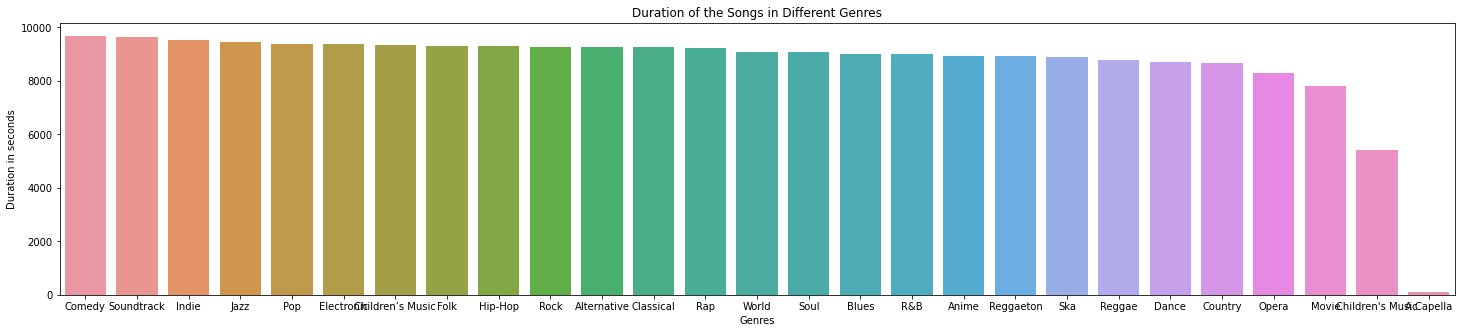

In [ ]:
plt.figure(figsize=(25,5))
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket", as_cmap= True)
sns.barplot(x='genre', y='duration_sec', data=df_numbercharteds)
plt.ylabel("Duration in seconds")
plt.xlabel("Genres")

7. to determine who has most duration

In [ ]:
df_numberchart=df_onetracks.groupby('artist_name').sum().sort_values('duration_sec', ascending=False)
df_numberchart=df_numberchart.reset_index()
df_numberchart

,artist_name,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,Emotions
0,GiuseppeVerdi,17257,1239.9760,395.6277,320154.235,203.743380,156.829244,327.8012,-26189.953,87.5034,130648.145,237.2894
1,RichardWagner,9459,727.8960,168.8469,295230.840,118.535219,332.350782,181.8288,-16163.275,43.2983,72723.262,73.7910
2,WolfgangAmadeusMozart,17751,768.5180,257.5442,271693.972,95.973640,438.552784,161.4606,-17787.345,46.1422,86139.752,214.3261
3,GiacomoPuccini,14617,1043.5980,282.9923,246990.302,199.157510,157.991584,268.4681,-19584.215,59.5718,107059.356,150.9206
4,LudwigvanBeethoven,14572,572.7670,193.0588,240604.507,63.416320,427.021873,94.6384,-14607.873,29.0969,64025.923,134.4986
...,...,...,...,...,...,...,...,...,...,...,...,...
13693,Emma-JeanThackray,41,0.2970,0.6520,41.667,0.355000,0.879000,0.0889,-16.321,0.0719,97.916,0.1240
13694,AdamGussow,33,0.7510,0.5360,35.973,0.229000,0.000000,0.6290,-24.760,0.0537,148.165,0.9640
13695,MokaOnly,47,0.4440,0.6800,34.750,0.274000,0.681000,0.1010,-14.523,0.1440,186.413,0.9730
13696,Thomas&Friends,50,0.0793,0.9430,30.891,0.505000,0.000038,0.0810,-12.124,0.0734,98.861,0.4630


8. to determine who has most duration

Text(0, 0.5, 'Duration')

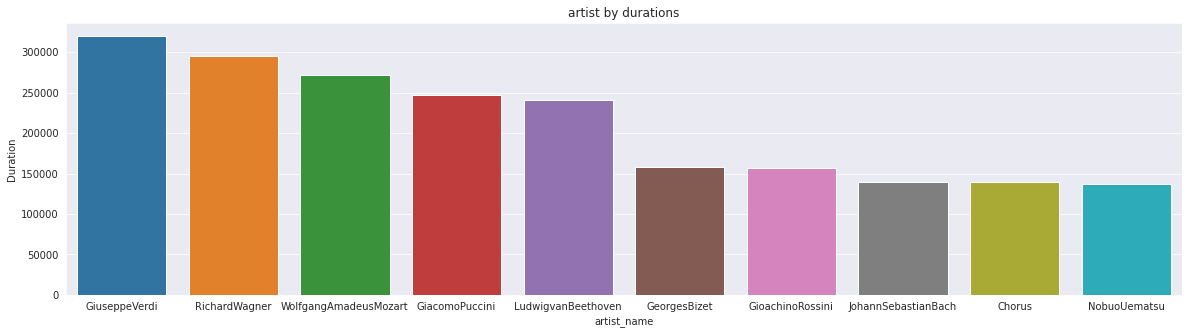

In [ ]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(20,5))
famous= df_numberchart.sort_values('duration_sec', ascending = False).head(10)
sns.barplot(x='artist_name', y='duration_sec', data = famous).set(title= "artist by durations")
plt.ylabel("Duration")

9. How many songs each artists have

In [ ]:
df_numbercharted=df_onetracks.groupby('artist_name').count().sort_values('track_name', ascending=False)
df_numbercharted=df_numbercharted.reset_index()
df_numbercharted

,artist_name,genre,track_name,track_id,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,Emotions
0,GiuseppeVerdi,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
1,GiacomoPuccini,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086
2,KimboChildren'sMusic,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871
3,WolfgangAmadeusMozart,799,799,799,799,799,799,799,799,799,799,799,799,799,799,799,799
4,RichardWagner,776,776,776,776,776,776,776,776,776,776,776,776,776,776,776,776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13693,Moira&Nieman,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13694,Mohombi,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13695,MohFlow,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13696,MoeGreen,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


10. The Most Popular Artist

In [ ]:
df_numberchartedss=df_onetracks.groupby('artist_name').mean().sort_values('popularity', ascending=False)
df_numberchartedss=df_numberchartedss.reset_index()
df_numberchartedss

,artist_name,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,Emotions
0,PedroCapó,87.0,0.26100,0.7815,209.1330,0.7035,0.000000,0.11165,-4.7745,0.04995,126.9125,0.6555
1,MarioBautista,85.0,0.02750,0.8040,218.4700,0.7050,0.000138,0.20200,-5.2720,0.19900,103.0090,0.4500
2,MauyRicky,83.0,0.08245,0.7220,230.0265,0.7115,0.000002,0.19950,-4.5120,0.20100,172.9930,0.7425
3,KrisKrossAmsterdam,82.0,0.15100,0.7340,163.6360,0.7650,0.000000,0.23100,-5.5620,0.06210,109.9890,0.5180
4,SofiaReyes,82.0,0.16500,0.7920,201.5260,0.8950,0.000000,0.05010,-3.1120,0.05890,94.9680,0.7940
...,...,...,...,...,...,...,...,...,...,...,...,...
13693,TölzerKnabenchor,0.0,0.71700,0.7270,200.2670,0.6770,0.000000,0.22800,-4.6660,0.02800,109.3920,0.9200
13694,JackGrunsky,0.0,0.39920,0.6698,228.6760,0.4818,0.000000,0.12832,-9.3584,0.03610,122.7528,0.5650
13695,NurseryRhymesClub,0.0,0.38600,0.4580,147.8790,0.2680,0.868000,0.10600,-15.9200,0.10600,187.3740,0.4300
13696,TheSippyCups,0.0,0.87500,0.6360,120.2000,0.8480,0.000000,0.68400,-7.8330,0.91800,81.2480,0.6350


In [ ]:
artist = df_onetracks['artist_name'].unique()
len(artist)

13698

11. Which genre has more popularity

In [ ]:
df_number=df_tracks.groupby('genre').mean().sort_values('popularity', ascending=False)
df_number=df_number.reset_index()
df_number

,genre,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,Emotions
0,Pop,66.591263,0.224823,0.640238,220.855250,0.642219,0.016601,0.179955,-6.495379,0.107933,121.173240,0.481377
1,Rap,60.533745,0.168078,0.697253,219.849773,0.650532,0.009318,0.198929,-6.669891,0.188165,121.098152,0.455922
2,Rock,59.619392,0.196429,0.538292,237.003227,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113
3,Hip-Hop,58.423131,0.176172,0.718808,219.981913,0.643275,0.011200,0.201146,-6.860286,0.205396,120.791039,0.473381
4,Dance,57.274943,0.152884,0.638193,226.261345,0.698085,0.035453,0.187742,-6.054144,0.083574,120.793066,0.517765
5,Indie,54.701561,0.331214,0.566821,224.150374,0.581002,0.085317,0.168919,-7.915142,0.066724,119.290814,0.428665
6,Children’s Music,54.659040,0.163175,0.541843,232.554444,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
7,R&B,52.308719,0.288216,0.642125,225.748130,0.564248,0.025558,0.175350,-7.597064,0.120994,116.373834,0.450346
8,Alternative,50.213430,0.162313,0.541898,233.241364,0.711519,0.061303,0.196985,-6.540803,0.088783,122.534485,0.449590
9,Folk,49.940209,0.463201,0.527276,235.805457,0.491733,0.084934,0.170773,-9.870282,0.045077,118.748882,0.440237


[Text(0.5, 1.0, 'Genres by Popularity')]

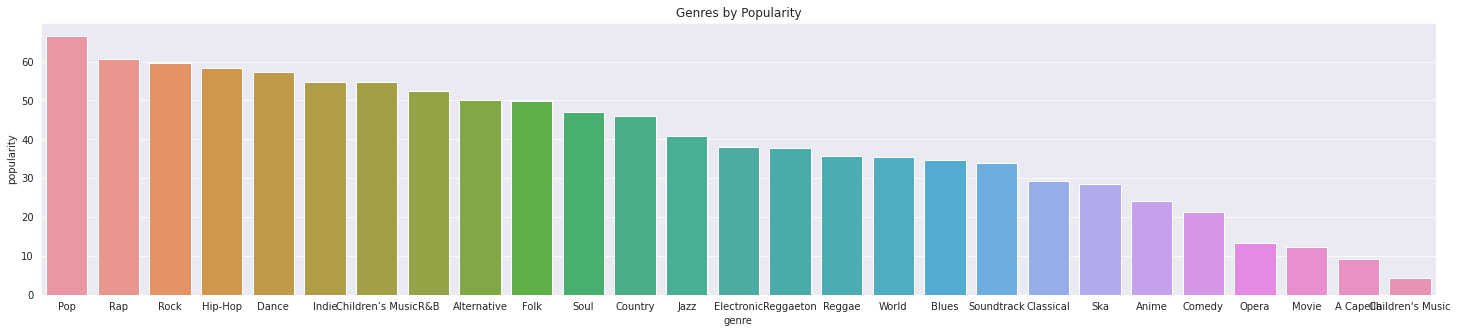

In [ ]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(25,5))
famous= df_number.sort_values("popularity", ascending = False)
sns.barplot(x='genre', y='popularity', data = famous).set(title= "Genres by Popularity")

Text(0, 0.5, 'Popularity')

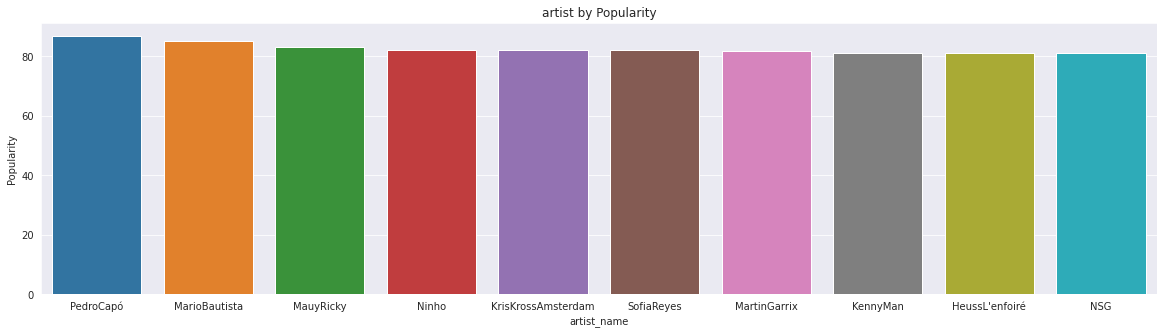

In [ ]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(20,5))
famous= df_numberchartedss.sort_values('popularity', ascending = False).head(10)
sns.barplot(x='artist_name', y='popularity', data = famous).set(title= "artist by Popularity")
plt.ylabel("Popularity")

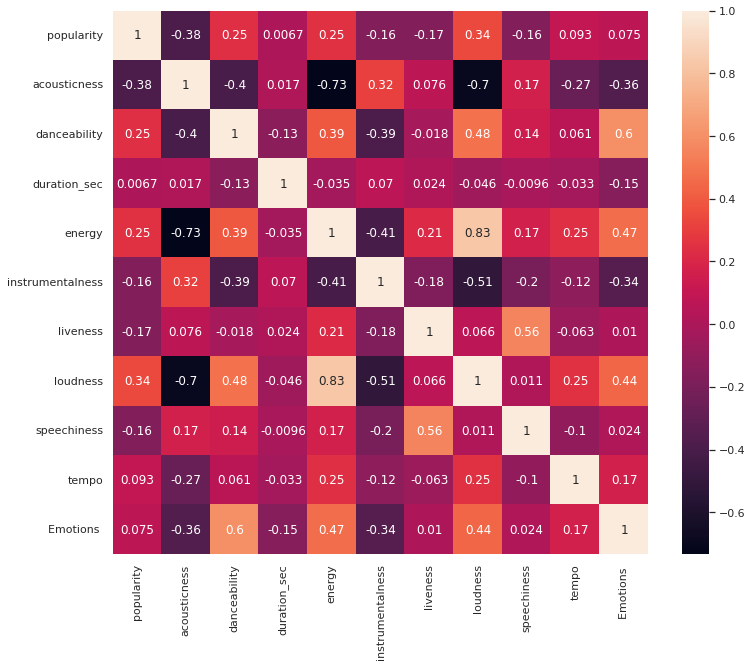

In [ ]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(df_onetracks.corr(), annot=True)
plt.show()


[Text(0.5, 1.0, ' Energy vs Speechiness Correlation')]

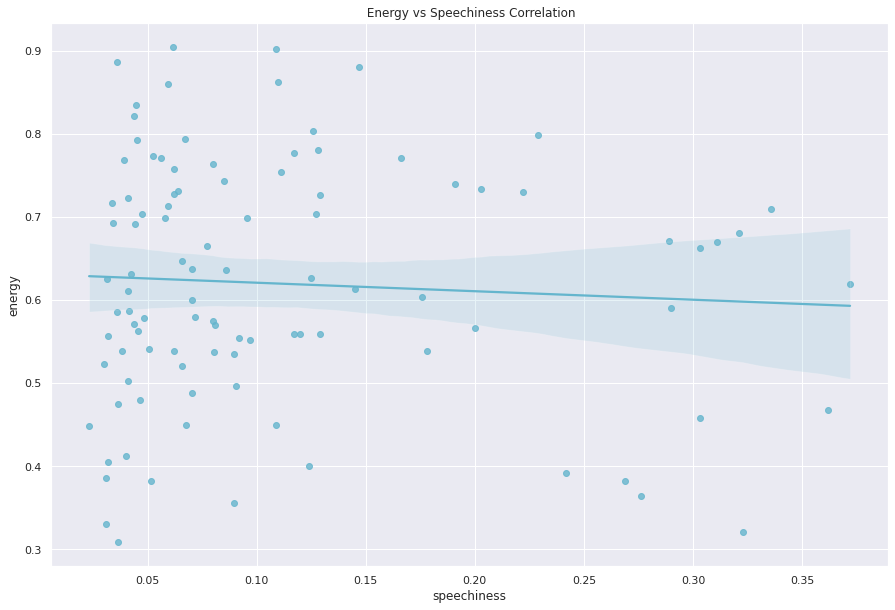

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_onetrackss = df_onetracks.head(100)
plt.figure(figsize=(15,10))
sns.regplot(data=df_onetrackss, y='energy', x='speechiness', color='c').set(title=' Energy vs Speechiness Correlation')

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:359: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color = mpl.colors.rgb2hex(mpl.colors.colorConverter.to_rgb(color))


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

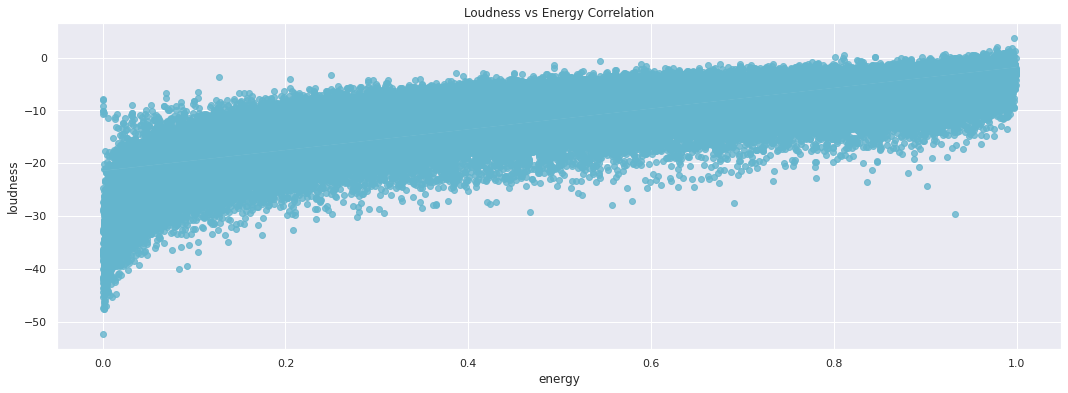

In [ ]:
plt.figure(figsize=(18,6))
sns.regplot(data = df_onetracks, y= "loudness", x = "energy", color = "C").set(title="Loudness vs Energy Correlation")